# Lesson 8: Bayesian Inference

## Overview
In this lab, we will learn the fundamentals of Bayesian inference and how to apply it to real-world problems using Python. We will cover the necessary libraries, theoretical background, and practical applications.

## Setup and Installation
<font color='red'>Libraries installation takes a long time so please run it ASAP</font>

### 1- Install Required Libraries
First, we need to install the necessary libraries.

In [ ]:
! sudo apt-get update
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
! unzip -o type1cm.zip -d /tmp/type1cm
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
! sudo texhash
!apt install cm-super
!pip install latex
!pip install bayesian-optimization

### 2- Import Libraries
After installation, we import the libraries.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sys
from latex import *
from bayes_opt import BayesianOptimization

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install pymc
    !pip install arviz

## **Introduction to Bayesian Inference**

---


###  **- What is Bayesian Inference?**
Bayesian inference is a method of statistical inference in which Bayes' theorem is used to update the probability for a hypothesis as more evidence or information becomes available.

Lets say we flip a coin, and get
$h$ heads and $t$ tails, the probability follows a [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution):
where $D$ is the event of getting $h$ heads and $t$ tails,
$\theta$ is the probability of heads, and $1-\theta$
is the probability of tails.

### **- Bayes' Theorem**
 Let say we want to flip the conditional probability using Bayes' theorem:

$$P(\theta|D)=\frac{P(D|\theta)P(\theta)}{P(D)}$$

The conditional probability, $P(\theta|D)$, treats the probability of heads,
$\theta$, as a random variable. It is the probability of
$\theta$, given that we observed the event $D$. To make speaking of these probabilies easier they are given names:

$P(\theta)$ - the prior;

$P(\theta|D)$ - the posterior;

$P(D|\theta)$ - the likelihood.


Next, lets look at the prior, $P(\theta)$. This is the probability of $\theta$ before any coin flips. In other words, this is the measure of the belief before we perform the experiment. For the coin flipping example, we normally come across coins that have $\theta=0.5$, so our prior should center around $0.5$. For now, lets pick a [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha =2$, $\beta=2$ as our prior:
 $$P(\theta)=\frac{1}{B(\alpha, \beta)} {\theta}^{\alpha -1}(1-\theta)^{\beta-1}$$    

Let us derive the closed formula for posterior distribution. Let $t$ denote the number of tails observed and $h$ denote the number of heads observed. Then the likelihood has a binomial distribution:

$$
  P(D|\theta) = C_{h+t}^h \theta^h (1 - \theta)^{t}
$$

Then we can calculate the marginal distribution of the data:
$$
  P(D) = \int_0^1 P(D|\theta)P(\theta) d\theta = \int_0^1 C_{h+t}^h \theta^h (1 - \theta)^{t} \frac{1}{B(\alpha, \beta)} {\theta}^{\alpha -1}(1-\theta)^{\beta-1}d\theta\\
  = \frac{1}{B(\alpha, \beta)} C_{h+t}^h \int_0^1 \theta^{h + \alpha - 1} (1 - \theta)^{t + \beta - 1} d\theta = C_{h+t}^h \frac{B(\alpha + h, \beta + t)}{B(\alpha, \beta)}
$$

Then, finally the posterior is:
$$
  P(\theta | D) = \frac{C_{h+t}^h \theta^h (1 - \theta)^{t} \frac{1}{B(\alpha, \beta)} {\theta}^{\alpha -1}(1-\theta)^{\beta-1}}{C_{h+t}^h \frac{B(\alpha + h, \beta + t)}{B(\alpha, \beta)}} = \frac{1}{B(\alpha + h, \beta + t)} \theta^{\alpha + h - 1} (1 - \theta)^{\beta + t - 1}
$$

and we see that it's again a Beta distribution.

In [ ]:
# PyMC generates a FutureWarning we don't need to deal with yet
import pymc as pm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# configure style
mpl.rc('text', usetex=True)
mpl.rc('font', size=26)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

    ax.plot(x, y)
# plt.rcParams['text.usetex'] = True

# mpl.rcParams.update(mpl.rcParamsDefault)

sns.set_style("darkgrid")
sns.set_context("talk", rc={"figure.figsize": (12, 8)}, font_scale=1.0)
current_palette = sns.color_palette()

## **Practical Application**

---




### **Simple Bayesian Model :**
We will start with a simple Bayesian model using a coin flip example.

Lets say we flipped the coin 17 times and observed 5 heads and 12 tails, our posterior becomes:

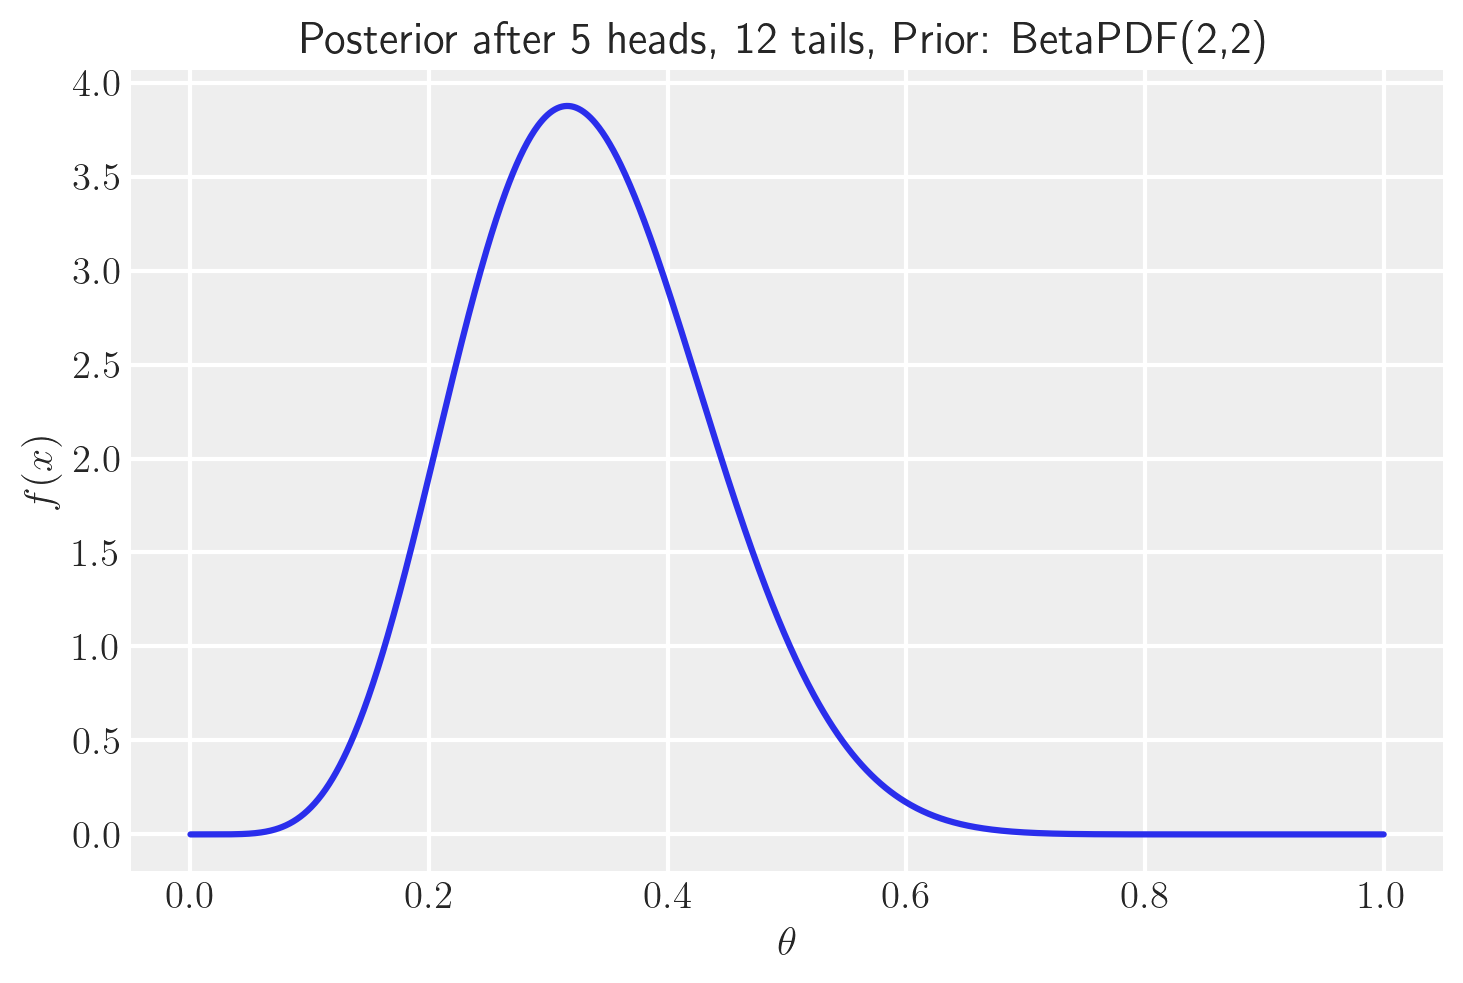

In [ ]:
def plot_posterior(heads, tails, alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta.pdf(x, heads+alpha, tails+beta)

    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$", fontsize=15)
    ax.set_ylabel(r"$f(x)$", fontsize=15)
    ax.set_title("Posterior after {} heads, {} tails, \
                 Prior: BetaPDF({},{})".format(heads, tails, alpha, beta));

plot_posterior(heads=5, tails=12, alpha=2, beta=2)

With $5$ heads and $12$ tails, our belief of the possible values of $\theta$ shifts to the left, suggesting that $\theta$ is more likely to be lower than $0.5$. Now lets say we flipped $75$ times and observed $50$ heads and $25$ tails:

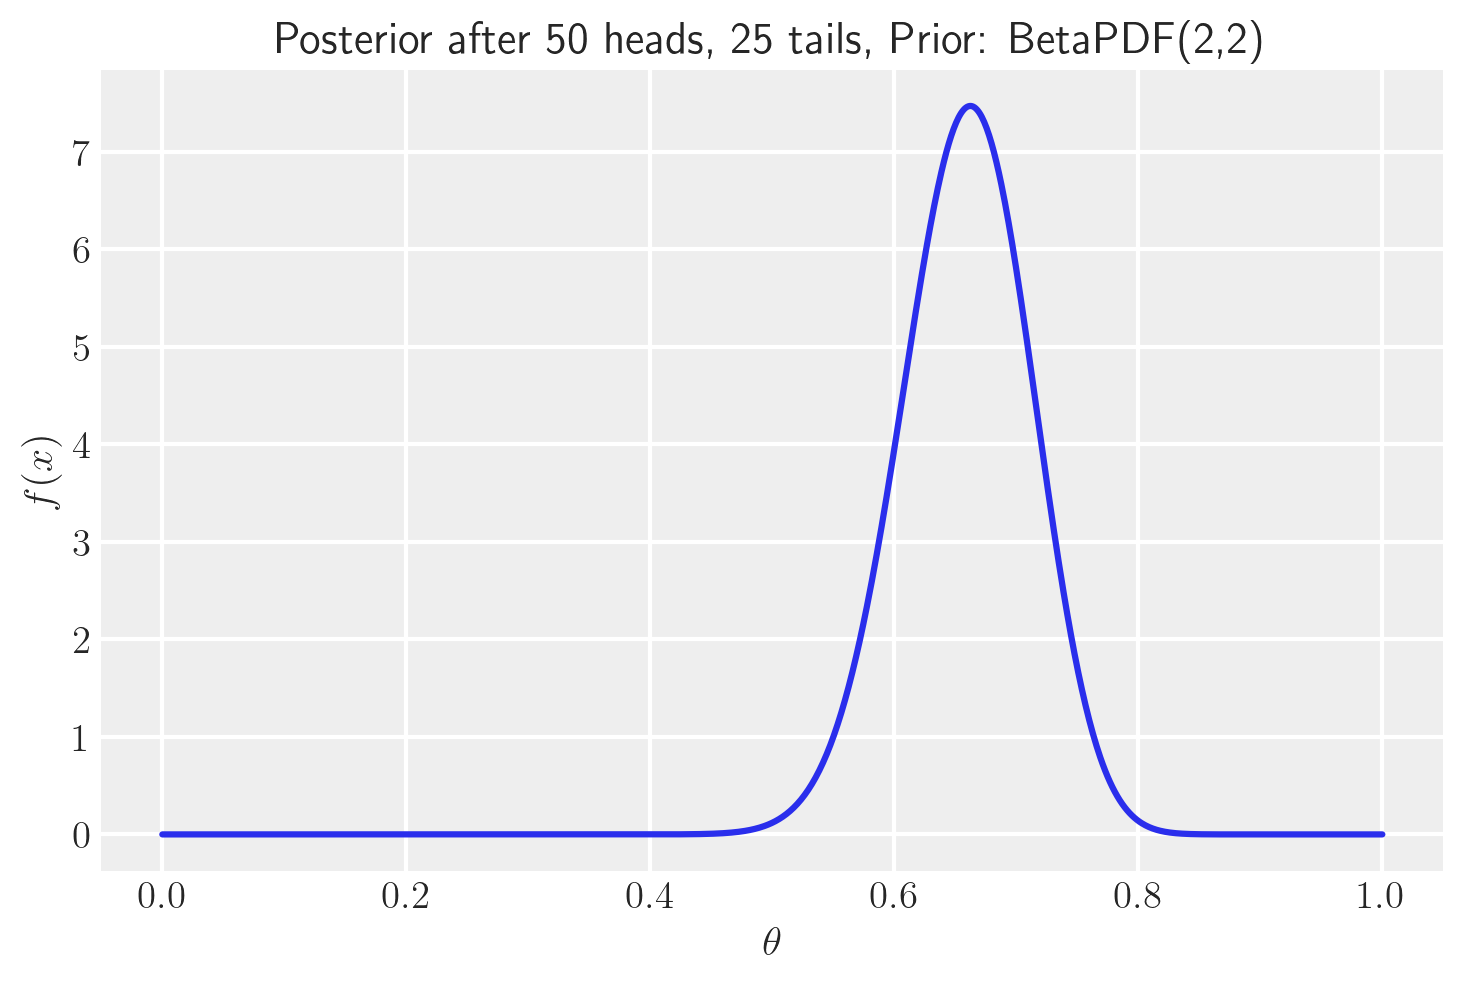

In [ ]:
plot_posterior(heads=50, tails=25, alpha=2, beta=2)

<ipython-input-35-82be5900629a>:6: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0.8)


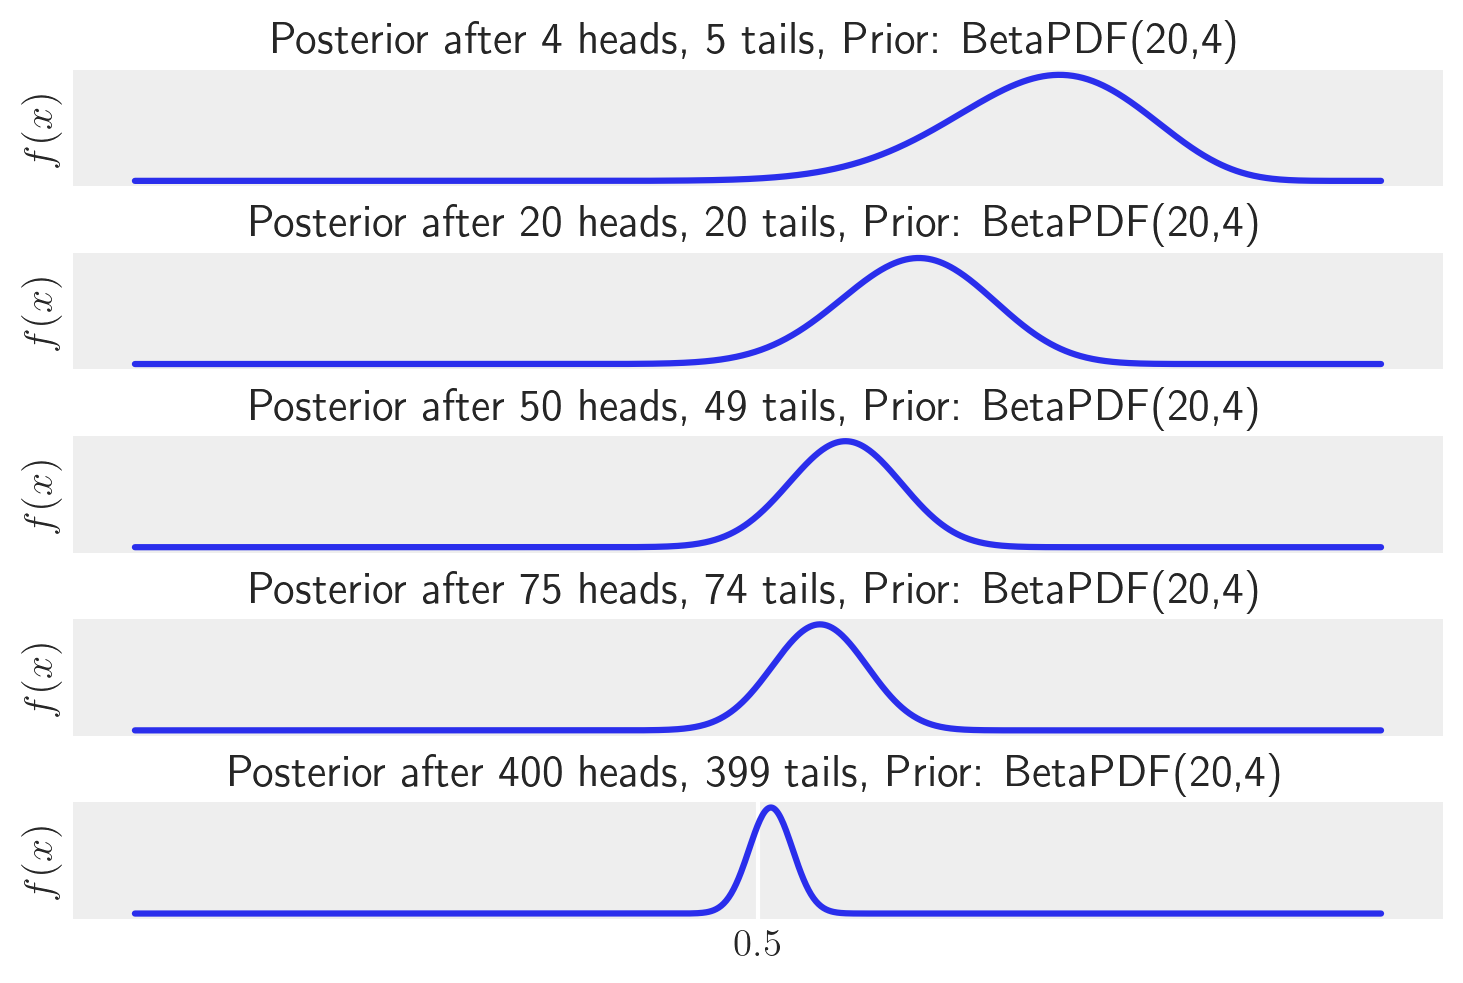

In [ ]:
fig, axes = plt.subplots(5)
flips = [(4, 5), (20, 20), (50, 49), (75, 74), (400, 399)]
for i, flip in enumerate(flips):
    plot_posterior(heads=flip[0], tails=flip[1], alpha=20, beta=4, ax=axes[i])
    axes[i].set_yticks([])
fig.subplots_adjust(hspace=0.8)
for ax in axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("")
axes[4].set_xticks([0.5])

### **Advanced Bayesian Modeling (Bayesian Linear Regression):**
We will now move to a more advanced example: Bayesian linear regression.

Lets consider the linear regression model. Let $Y$ denote the observed variable that we want to predict using features $X_1$ and $X_2$.

Furrther, suppose that $Y \sim N(\mu, \sigma^2)$. Then $\mu = \alpha + \beta_1 X_1 + \beta_2 X_2$, where $\alpha \sim N(0, 100)$, $\beta_i \sim N(0, 100)$ and $\sigma \sim |N(0, 1)|$.

So, for both regression coefficients we use zero-mean normal distribution with variance 100 and half-normal distribution as a prior for $\sigma$.

In case of the Bayesian linear regression we are constructing we following posterior distribution:

$$
  P(\alpha, \beta, \gamma | Y, X) \propto P(Y | \alpha, \beta, \gamma) P(\alpha) P(\beta) P(\gamma)
$$

In [ ]:
import arviz as az

In [ ]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [ ]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

Lets take a look at generated data:

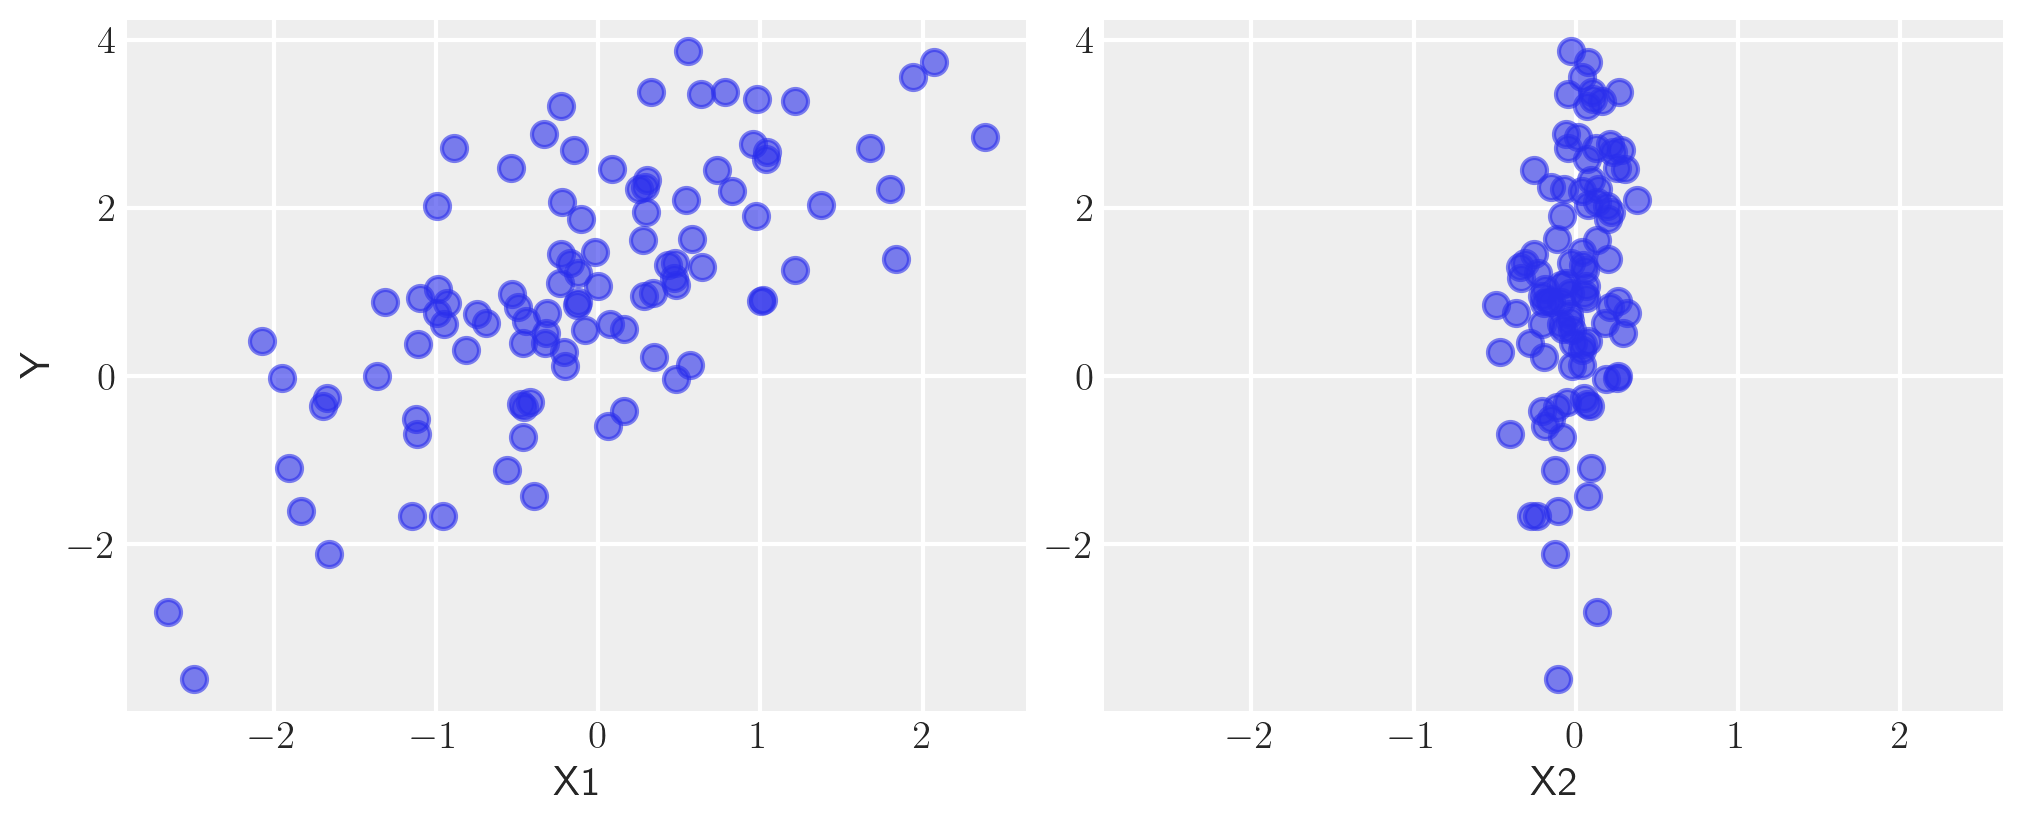

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

###  **Define the Bayesian Linear Regression Model**

Now lets see how we can define a linear regression model using PyMC library:

In [ ]:
# Create a model
basic_model = pm.Model()

# Within this context manager we can describe relations between random variables
# that we aim to model
with basic_model:
    # Priors for unknown model parameters
    # These three distributions are so called "stochastic" random variables -
    # their is state is only partionally described by their parents.
    # For a convenience the first argument of a consturtor (name of the variable)
    # must be the same as the name of corresponding Python variable.
    # See: https://www.pymc.io/projects/docs/en/latest/api/distributions.html
    # for other supported distributions
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    # This one is a deterministic RV - it's completely defined by its parents,
    # no matter which values they take. RVs support basic arithmetic operations
    # as well as mathematical functions like sum, sin, exp, dot or inv (of a matrix)
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    # Special case - observed stochastic RV. Model can't change the values of Y_obs
    # Further, parameters of this distribution are deterministic mu and stochastic sigmaLets also visualise our model:
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

Lets also visualise our model:

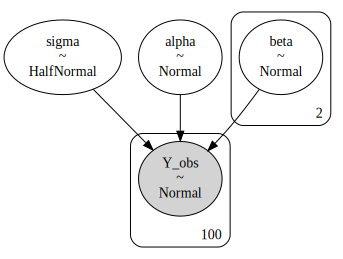

In [ ]:
pm.model_to_graphviz(basic_model)

Lets try to consider 1000 posterior samples from a model:

In [ ]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample(chains=4)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


In [ ]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

`InferenceData` stores plenty useful information regarding our model, including observed stochastic variable values and convergence related statistics. Lets observe some values for random variable $\alpha$:

In [ ]:
idata.posterior["alpha"].sel(draw=slice(0, 4))

<xarray.DataArray 'alpha' (chain: 4, draw: 5)>
array([[1.20829285, 1.20358211, 1.20560789, 1.13805732, 1.09502291],
       [1.06725646, 1.37316748, 1.26266106, 1.11710167, 1.10525142],
       [1.27868098, 1.13739011, 1.03940767, 1.23063086, 1.10420824],
       [1.04240503, 1.21798026, 1.03198443, 1.13374675, 1.16901206]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4

### **Posterior analysis**
 We can analyse posterior destribution of our stochastic variables using Arviz plotting utilities:

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


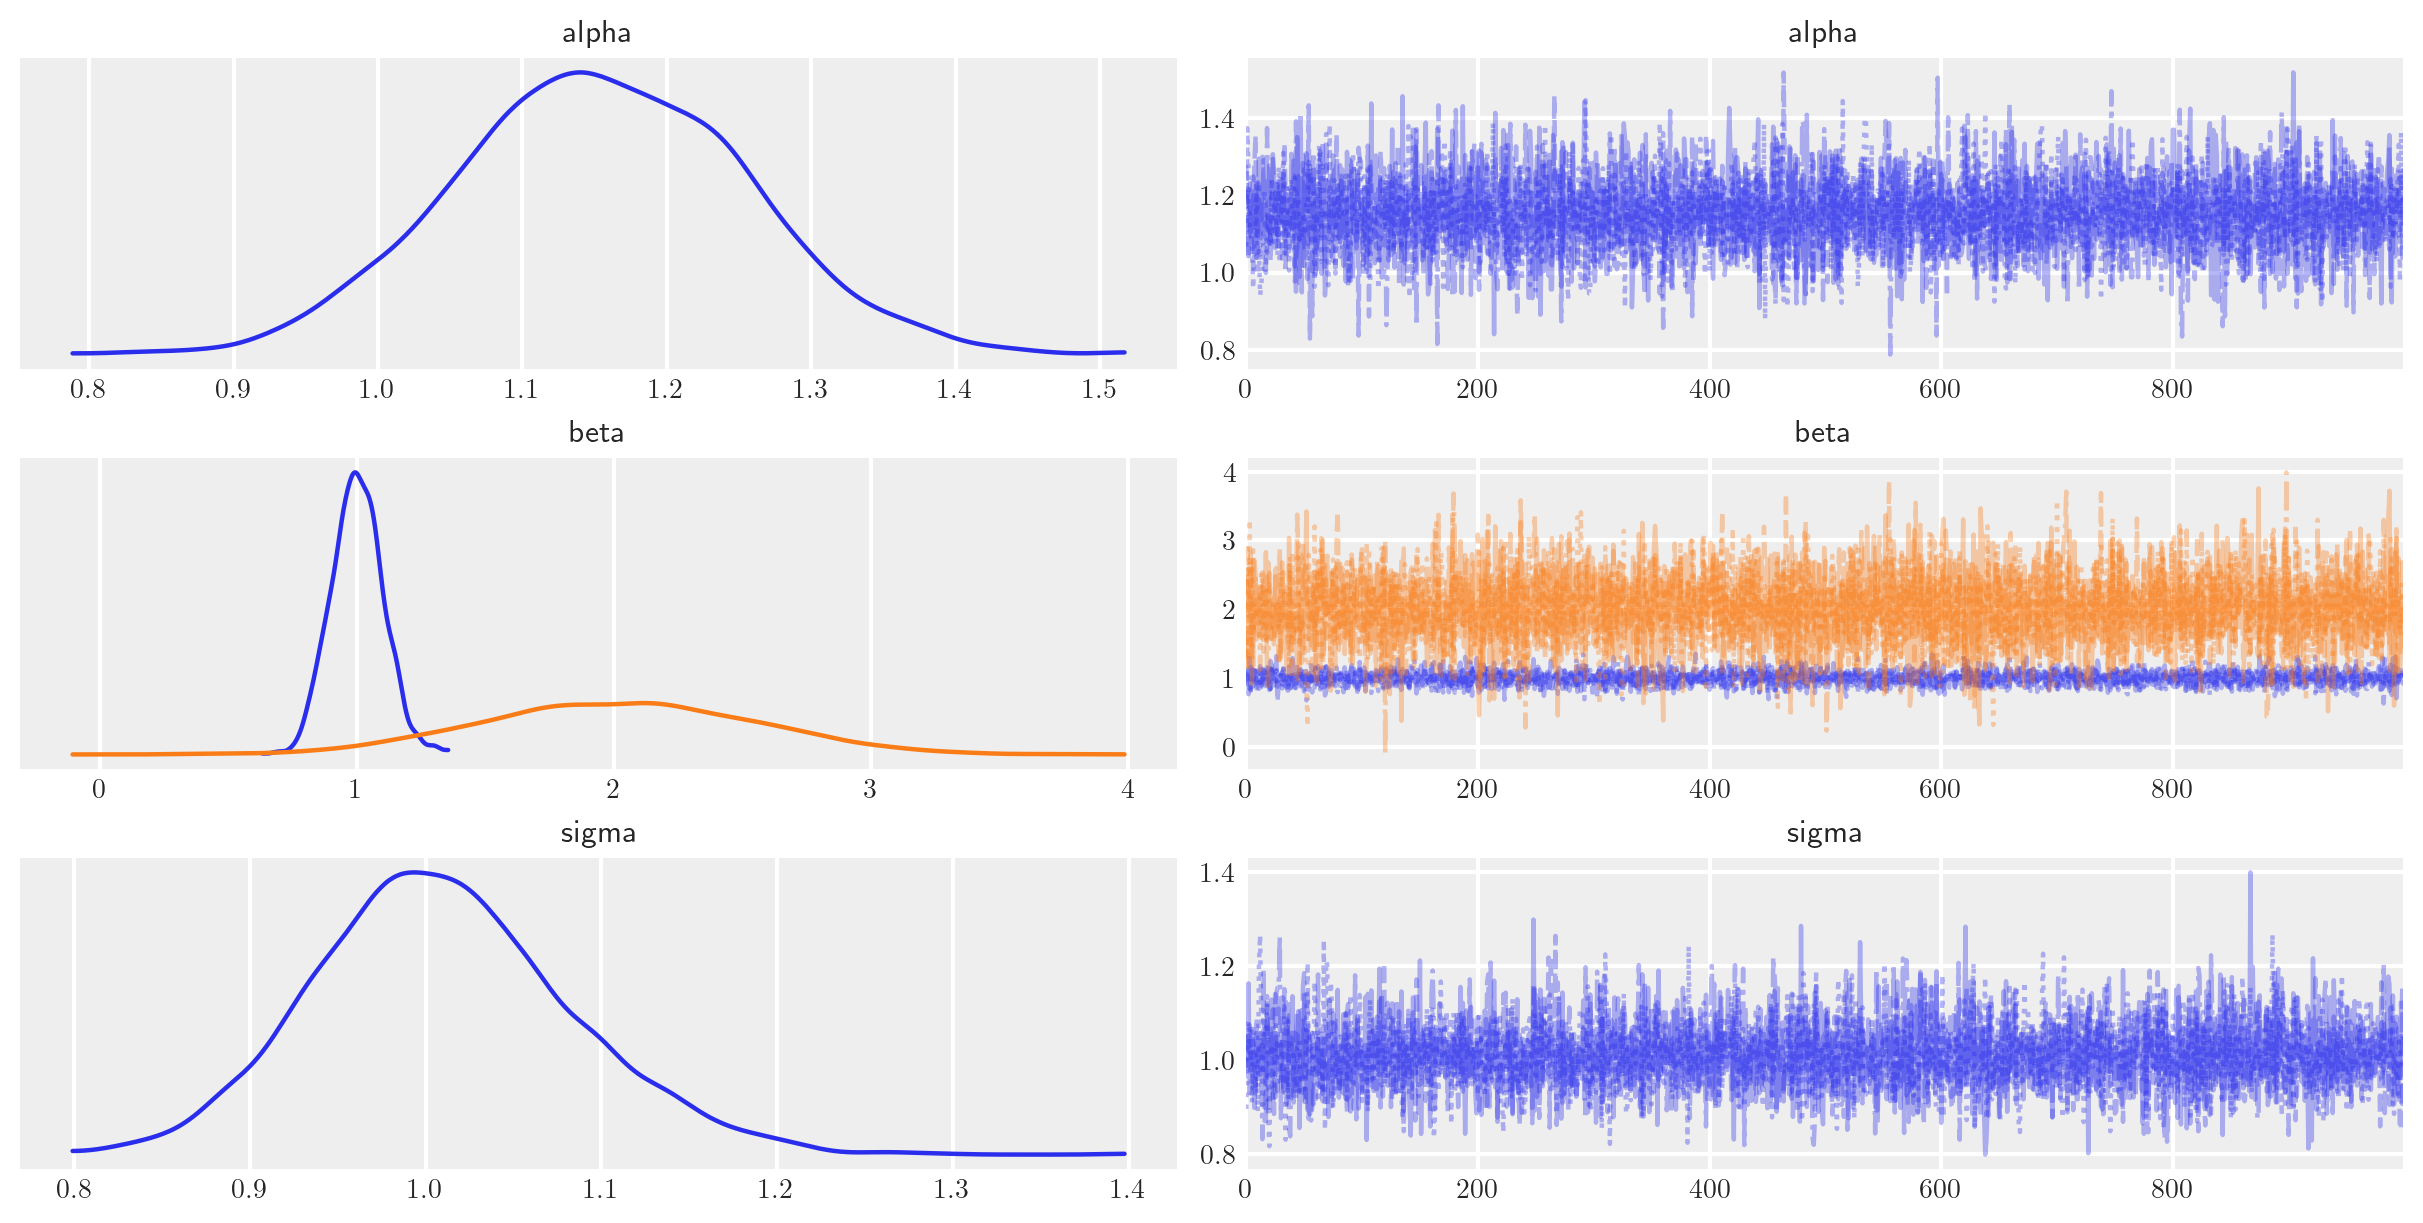

In [ ]:
az.plot_trace(idata, combined=True);

Left plots show a KDE smoothed marginal posteriors of stochastic RVS. Right charts samples from the Markov Chains (more about Markov chains you will see later in a course). Notice that since beta is a vector, it produces 2 marginals and 2 traces.

We can also observe a summary of the posterior statistics:

In [ ]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.15,0.10,0.96,1.34,0.00,0.00,5954.72,3354.26,1.0
beta[0],1.00,0.10,0.81,1.18,0.00,0.00,5948.15,2867.73,1.0
beta[1],2.01,0.53,1.05,3.02,0.01,0.01,5382.31,3005.64,1.0
sigma,1.01,0.07,0.87,1.15,0.00,0.00,5397.89,3167.24,1.0


##**Exercise 1: Logistic regression using PyMC**



1.1 complete the following code. load iris dataset and select only first two clases and take only first two features.

In [ ]:
iris = # Load the Iris dataset
X =  # Only take the first two features
y =  # Only take the first two classes



In [ ]:
assert X.shape == (100, 2), "X should have 100 samples and 2 features"
assert y.shape == (100,), "y should have 100 samples"

2.1 complete the following code to draw a scatter plot to check that selected classes are linearly separable.

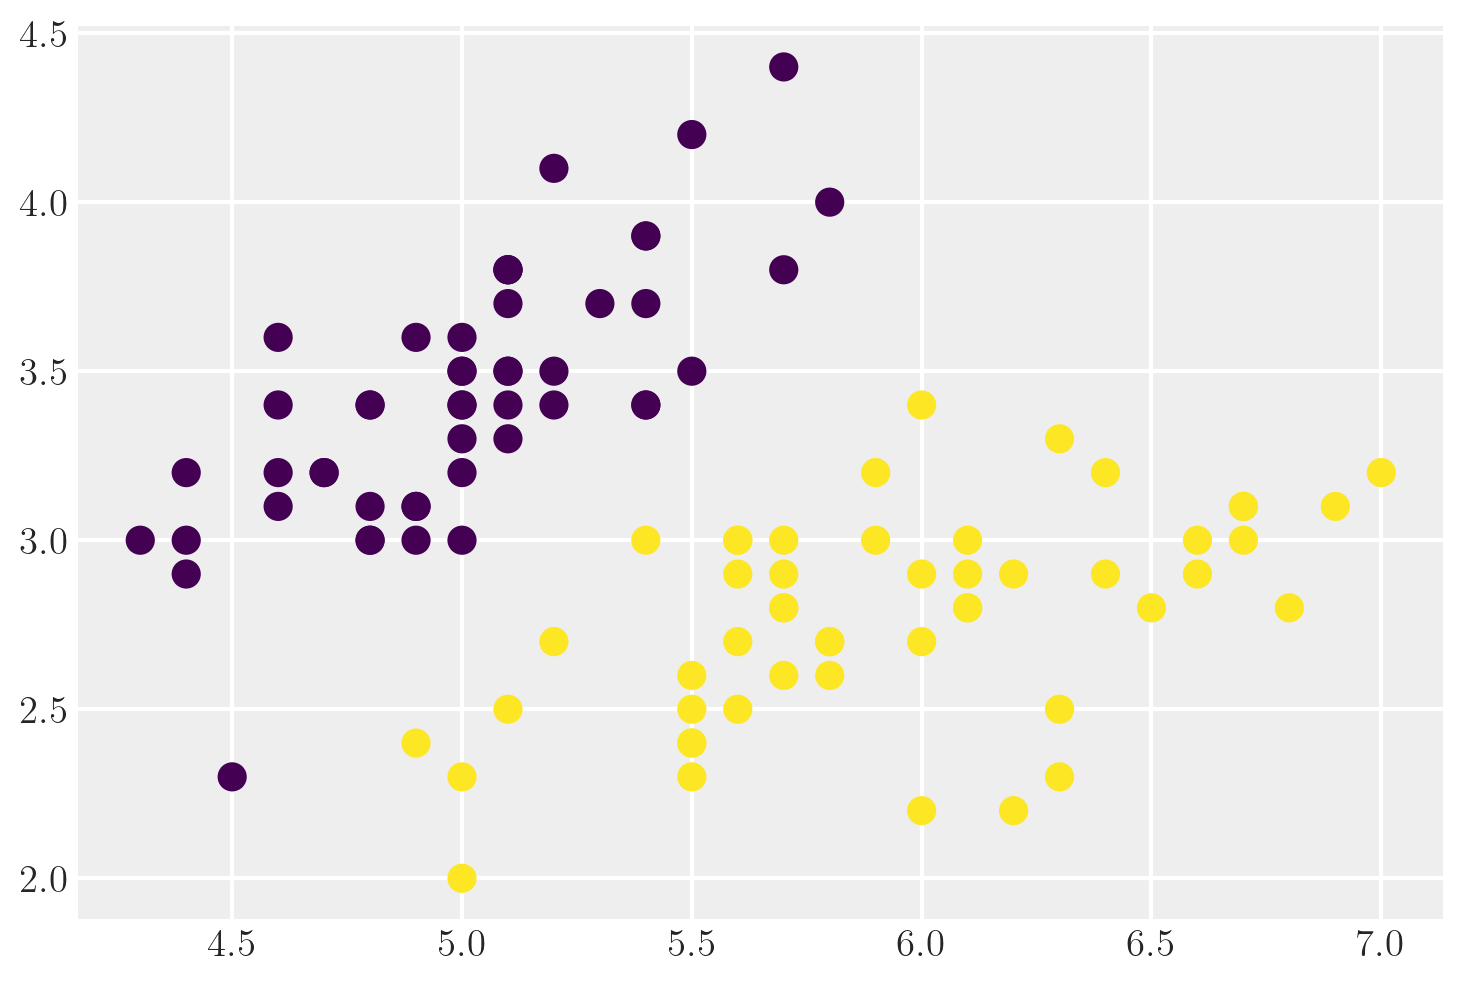

In [ ]:
# Visualize the data

# your code is here
plt.show()

3.1 Define Logistic regression model



-  Select apriori distribution for intercept to be normal with mean 0 and variance 100
-  Select apriori distribution for coefficients to be normal with mean 0 and variance 100 (notice that we have 4 of them, so we have to take it into account somehow. Documentation of `pm.Normal` might be useful)
-  Compute linear mu. *Hint:* you might need to check `pm.math` documentation
-  Choose a right distribution for logits. Don't forget to set parameter `observed`.

In [ ]:


with pm.Model() as logistic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = ....# your code is here..........

    # Linear model
    mu = ....# your code is here..........

    # Likelihood
    theta = ....# your code is here..........
    y_obs = ....# your code is here..........

    # Inference
    trace_logistic = pm.sample(2000, return_inferencedata=True)


4.1 write a code to Visualize the model and make sure that it looks correctly:

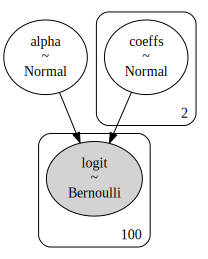

5.1 complete the following code. Fit the model and check the posterior distributions, and Check the model summary

In [ ]:
# Plot posterior distributions
....# your code is here..........
plt.show()

# Check the model summary
print(pm.summary(trace_logistic, var_names=['alpha', 'beta']))

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
ERROR:pymc.stats.convergence:There were 2136 divergences after tuning. Increase `target_accept` or reparameterize.


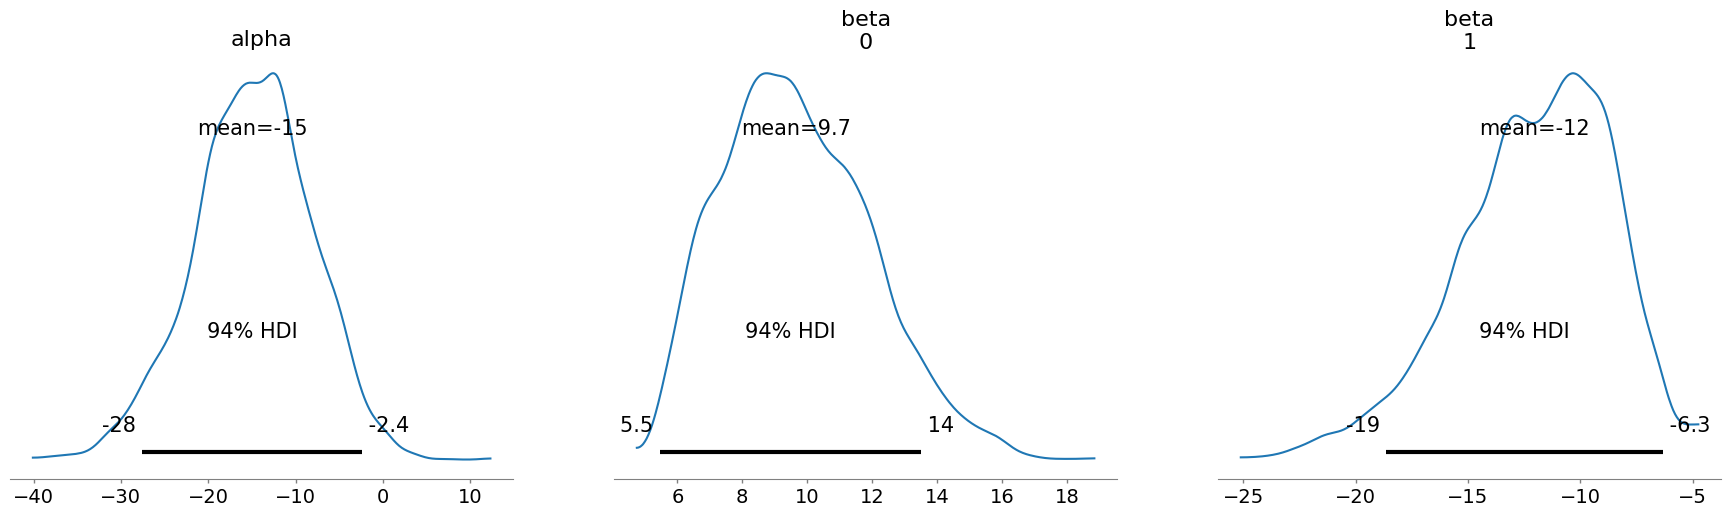

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha   -14.934  6.735 -27.547   -2.367      0.238    0.168     803.0   
beta[0]   9.667  2.266   5.472   13.510      0.124    0.088     307.0   
beta[1] -12.059  3.407 -18.637   -6.313      0.196    0.139     237.0   

         ess_tail  r_hat  
alpha       983.0    1.0  
beta[0]     347.0    1.0  
beta[1]     115.0    1.0  



## Conclusion:

In this lab, we introduced Bayesian inference, implemented simple and advanced Bayesian models, and analyzed the results. Bayesian inference is a powerful tool that allows us to update our beliefs with new evidence.